<a href="https://colab.research.google.com/github/farid-maulana/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operasi Dasar Citra

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# get image from gdrive
original = cv.imread("/content/drive/MyDrive/Images/female.tiff")

## Gamma Correction

Rumus:
```
𝐼 = 255 𝑥 (1/255)^Y
```



 Gamma Correction pada Citra 
---------------------------------
Masukkan nilai Gamma: 3


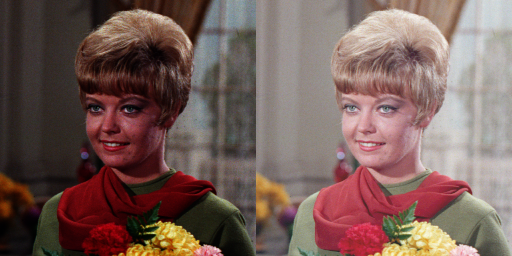

In [4]:
print(' Gamma Correction pada Citra ')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## Image Bit Depth



 Bit Depth pada Citra 
---------------------------------
Masukkan nilai Bit Depth: 3


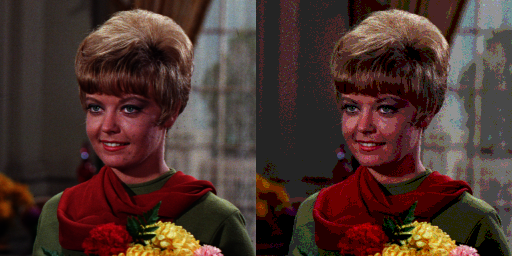

In [5]:
print(' Bit Depth pada Citra ')
print('---------------------------------')
try:
  bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bit_depth
level = 255/(bit-1)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bit_depth_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

# Average Denoising

Average Denoising
------------------------
Masukkan jumlah gambar: 100
Nilai PSNR: 27.370931279516654 dB


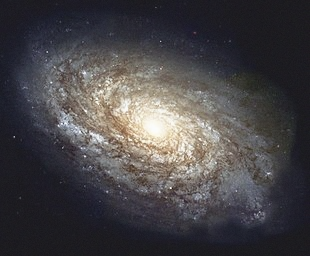

In [9]:
import glob
from math import log10, sqrt

print('Average Denoising')
print('------------------------')

try:
  img_amt = int(input('Masukkan jumlah gambar: '))
except ValueError:
  print('Error, not a number')

def PSNR(ori, compressed):
  mse = np.mean((ori - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

ori = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
denoising_avg = np.zeros(ori.shape, ori.dtype)

cv_img = []
for i in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n = cv.imread(i)
  cv_img.append(n)

denoising_avg = np.mean(cv_img[:img_amt], axis=0).astype(np.uint8)

value = PSNR(ori, denoising_avg)
print(f"Nilai PSNR: {value} dB")

final_frame = cv.hconcat((ori, denoising_avg))
cv2_imshow(denoising_avg)


# Image Masking

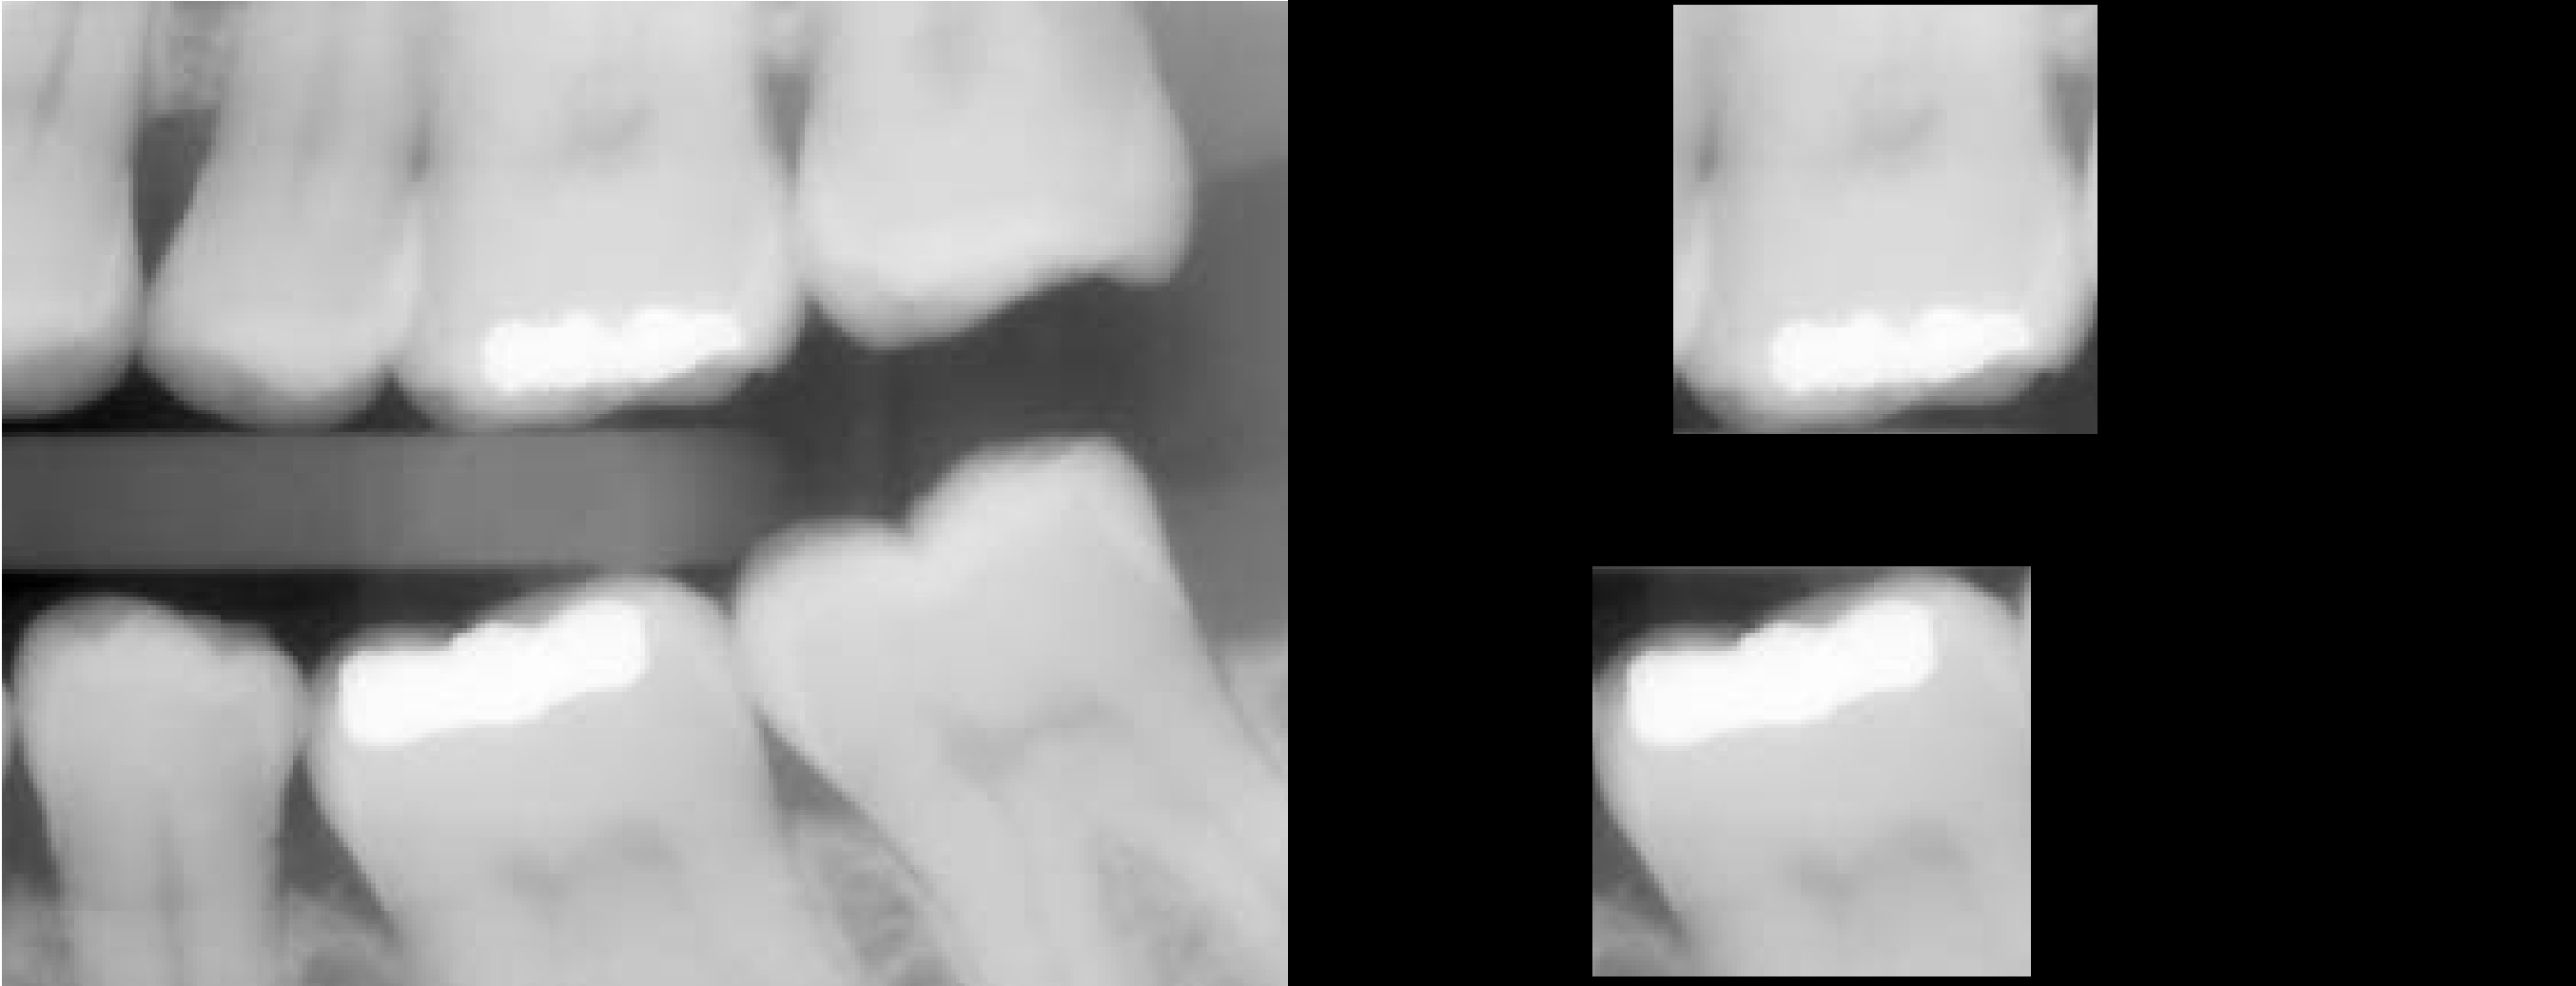

In [10]:
original = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
teeth_mask = np.zeros(original.shape, dtype = np.uint8)

teeth_mask = cv.rectangle(teeth_mask, pt1 = (320, 595), pt2 = (780, 1025), color=(255,255,255), thickness =-1)
result = original & teeth_mask

teeth_mask1 = cv.rectangle(teeth_mask, pt1 = (405, 5), pt2 = (850, 455), color=(255,255,255), thickness =-1)
result = original & teeth_mask1

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

OR

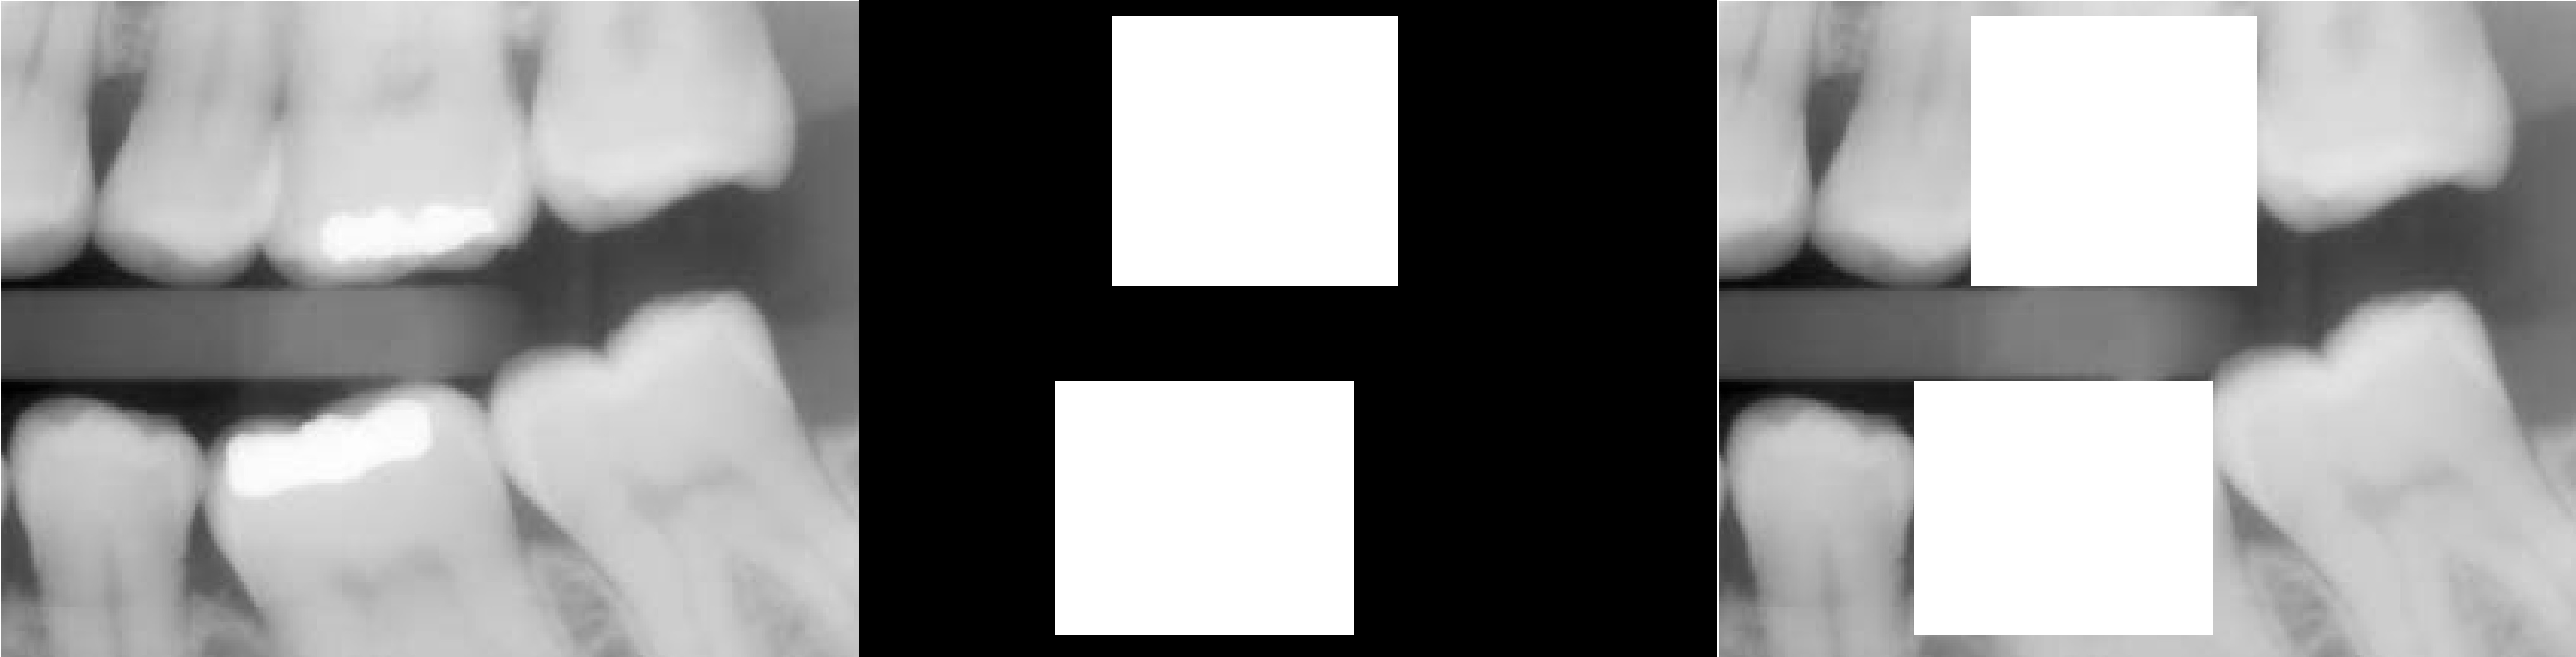

In [11]:
ori = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
blank_image = np.zeros(ori.shape, ori.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

masking_or = ori | blank_image

final_frame = cv.hconcat((ori, blank_image, masking_or))
cv2_imshow(final_frame)

NOT

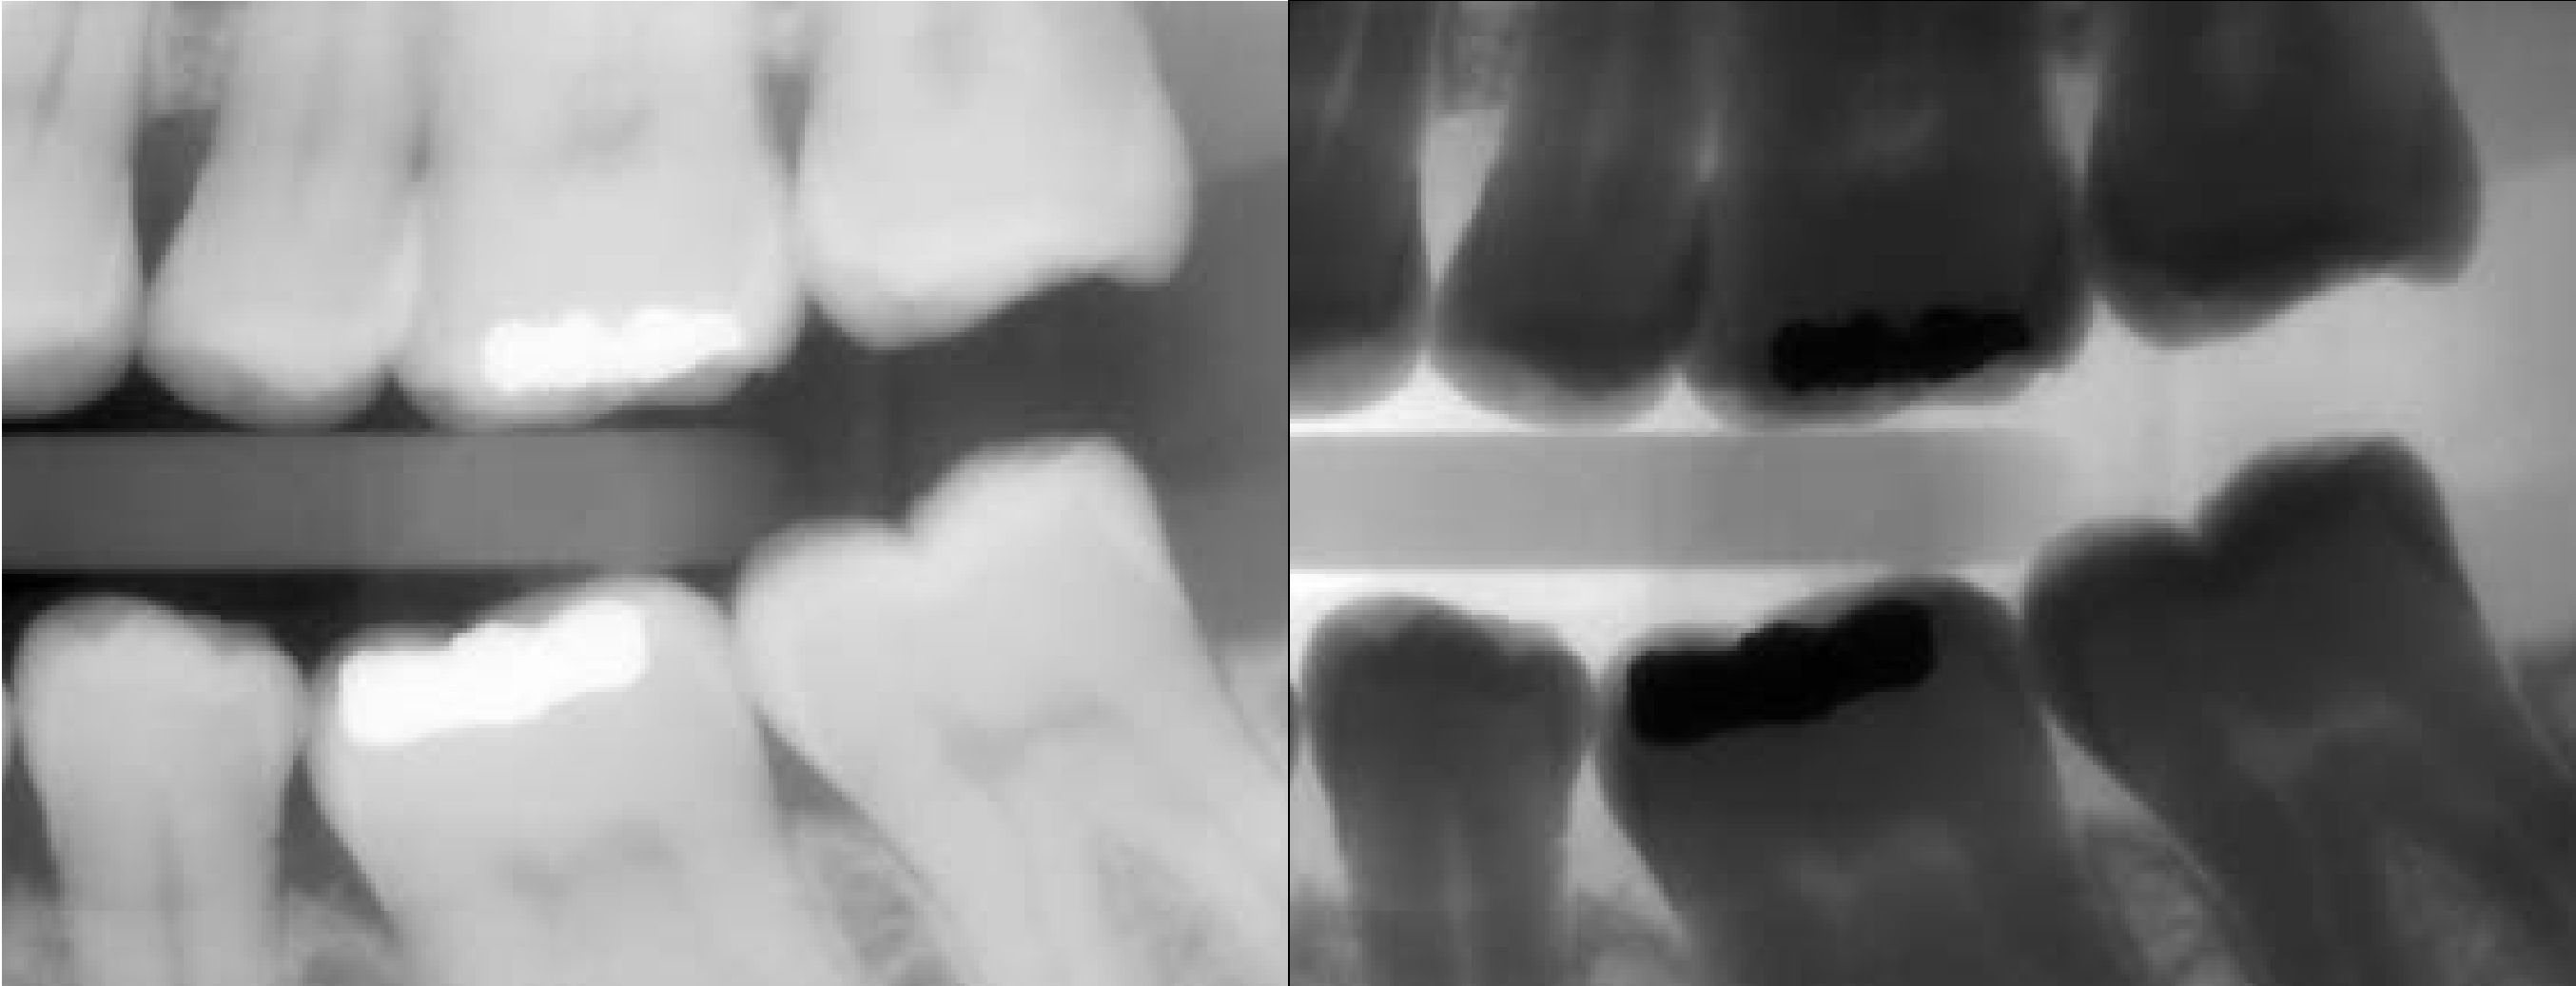

In [12]:
ori = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
blank_image = np.zeros(ori.shape, ori.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

masking_not = ~ori

final_frame = cv.hconcat((ori, masking_not))
cv2_imshow(final_frame)

NAND

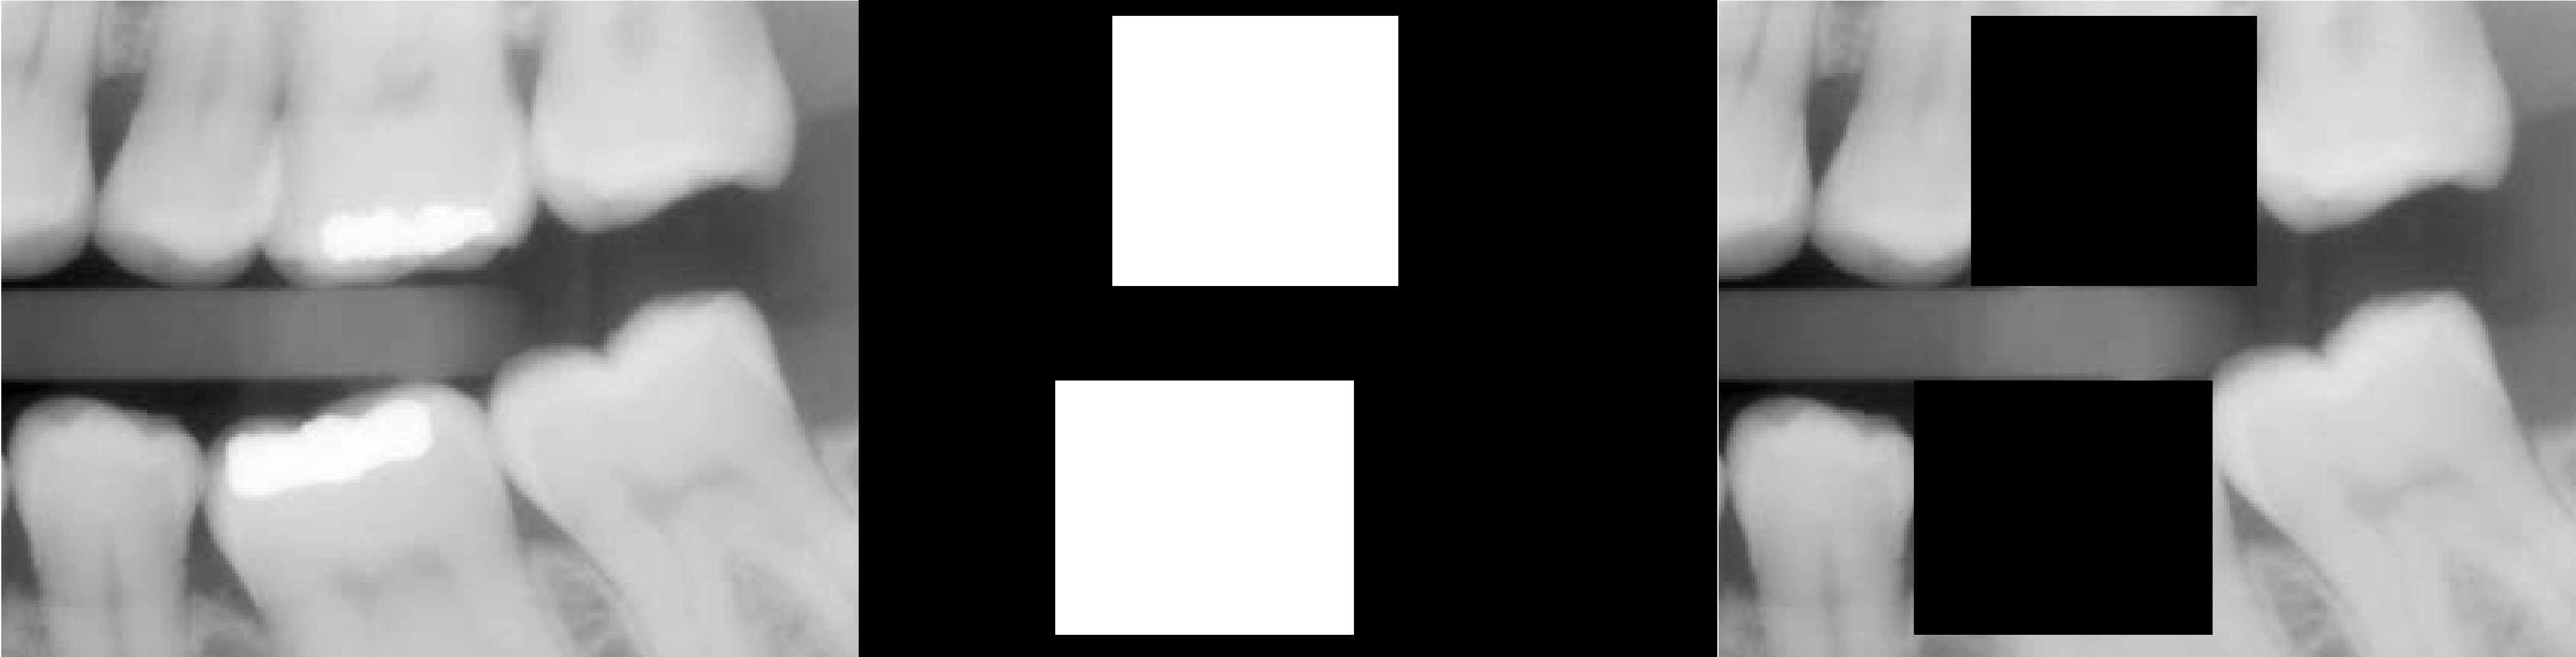

In [13]:
ori = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
blank_image = np.zeros(ori.shape, ori.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

masking_nand = ori & ~blank_image

final_frame = cv.hconcat((ori, blank_image, masking_nand))
cv2_imshow(final_frame)

XOR

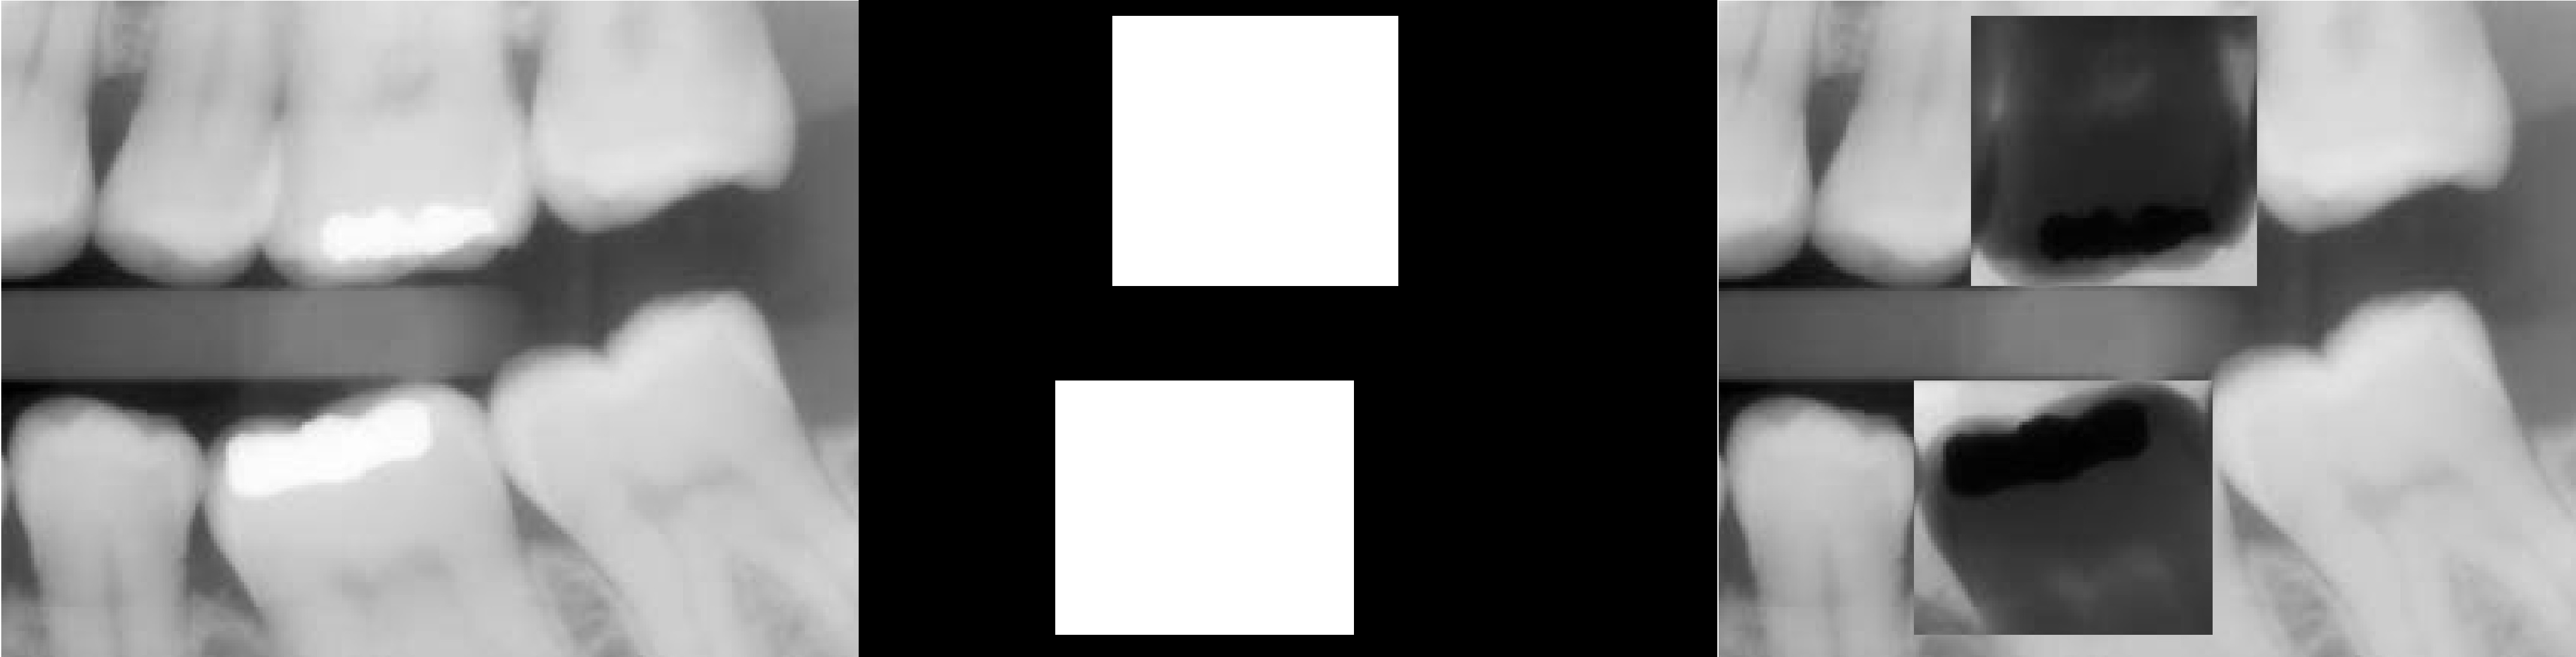

In [14]:
ori = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
blank_image = np.zeros(ori.shape, ori.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

masking_xor = ori ^ blank_image

final_frame = cv.hconcat((ori, blank_image, masking_xor))
cv2_imshow(final_frame)